In [26]:
#THIS IS A TEST FOR STATIC CASE -- NOT INDICATIVE OF MOBILE CASES

import os
import pandas as pd
import csv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [27]:
numCH = [None]*200
with open("Log-clusters.txt") as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))
    count = 0
    for row in data:
        numCH[count] = len(row)
        count = count+1
        for i in range(0,len(row)):
            row[i] = int(row[i])

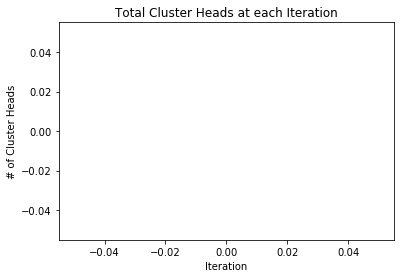

In [28]:
t = range(200)
plt.plot(t, numCH, 'ro')
plt.title("Total Cluster Heads at each Iteration")
plt.xlabel("Iteration")
plt.ylabel("# of Cluster Heads")
plt.show()

In [29]:
plt.figure()

def update_hist(num):
    plt.cla()
    plt.hist(data[num])
    plt.xlabel("Cluster Size")
    plt.ylabel("Frequency")
    plt.title("Cluster Sizes at T="+str(num))
    
fig = plt.figure()
hist = plt.hist(data[0])

IndexError: list index out of range

In [30]:
num =0
animation = animation.FuncAnimation(fig, update_hist, 200, fargs=(num) )
HTML(animation.to_html5_video())

IndexError: list index out of range

In [ ]:
count = 0
total_nodes = 2000
print("Iteration\t\t    ClusterSize Freq\t\t\tNodes in Cluster\tCluster Heads\t  No Cluster")
#print("\t         \t    0   1   2   3   4   5   6   7   8")
for row in data:
    
    cluster_nodes = 0
    cluster_heads = 0
    count_array = np.bincount(row) 
    for i in range(0,len(count_array)):
        cluster_heads = cluster_heads + count_array[i]
        cluster_nodes = cluster_nodes + count_array[i]*(i+1)
    
    print("  ",count,"\t\t",np.bincount(row),"\t\t    ",cluster_nodes-cluster_heads,"\t\t  ",cluster_heads,"\t\t   ",total_nodes-cluster_nodes)
    count = count+1

In [ ]:
numCH = [None]*200
with open("Log-cluster_messages.txt") as csv_file:
    msg_data = list(csv.reader(csv_file, delimiter=','))
    count = 0
    for row in msg_data:
        for i in range(0,len(row)):
            row[i] = int(row[i])

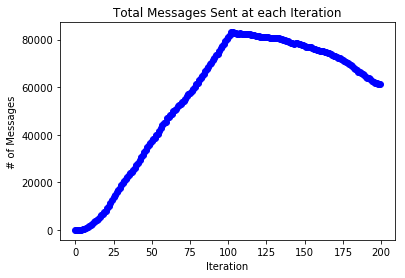

In [31]:
msg_clean = [x[:] for x in [[0] * 200] * 2]

for i in range(0,2):
    for j in range(0,200):
        msg_clean[i][j] = msg_data[j][i]

plt.plot(msg_clean[1],'bo')
plt.title("Total Messages Sent at each Iteration")
plt.xlabel("Iteration")
plt.ylabel("# of Messages")
plt.show()

In [32]:
node_av_data_CON = [x[:] for x in [["0"] * 2] * 200]
with open("Log-nodes_alive_valid_CL_ON.txt") as f:
    raw_av_data_CON = f.readlines()
    
for i in range(0,200):
    node_av_data_CON[i] = raw_av_data_CON[i].split(',')
    node_av_data_CON[i][1] = (node_av_data_CON[i][1].split("\n"))[0]
    node_av_data_CON[i][0] = float((node_av_data_CON[i][0].split(":"))[1])
    node_av_data_CON[i][1] = float((node_av_data_CON[i][1].split(":"))[1])
    
node_av_data_COFF = [x[:] for x in [["0"] * 2] * 200]
with open("Log-nodes_alive_valid_CL_OFF.txt") as f:
    raw_av_data_COFF = f.readlines()
    
for i in range(0,200):
    node_av_data_COFF[i] = raw_av_data_COFF[i].split(',')
    node_av_data_COFF[i][1] = (node_av_data_COFF[i][1].split("\n"))[0]
    node_av_data_COFF[i][0] = float((node_av_data_COFF[i][0].split(":"))[1])
    node_av_data_COFF[i][1] = float((node_av_data_COFF[i][1].split(":"))[1])

In [33]:
percent_alive_CON = [0.0]*200
percent_alive_COFF = [0.0]*200
for i in range(0,200):
    try:
        percent_alive_CON[i] = (node_av_data_CON[i][1]/node_av_data_CON[i][0])*100
    except ZeroDivisionError:
        percent_alive_CON[i] = 1
    try:
        percent_alive_COFF[i] = (node_av_data_COFF[i][1]/node_av_data_COFF[i][0])*100
    except ZeroDivisionError:
        percent_alive_COFF[i] = 1

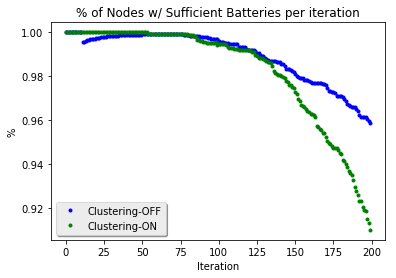

In [37]:
fig,ax = plt.subplots()
ax.plot(percent_alive_COFF,'b.',label="Clustering-OFF")
ax.plot(percent_alive_CON,'g.',label="Clustering-ON")
plt.title("% of Nodes w/ Sufficient Batteries per iteration")
plt.xlabel("Iteration")
plt.ylabel("%")
legend = ax.legend(loc='lower left', shadow=True)
plt.show()